# Data Frame Handling
In this notebook I used pandas library to demonstrate how to clean a dataset that has missing values,irrelevant data, add a new column to a data frame and save the dataframe to a new csv file.

Import the **pandas** library so the dataset 'house_price.csv' can be read into the notebook and using **df.head()** to get the first 5 rows of the dataset.

In [1]:
import pandas as pd
df = pd.read_csv("student.csv")
df.head()

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   ethnicity                    1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [3]:
df.shape

(1000, 8)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='math_score'>

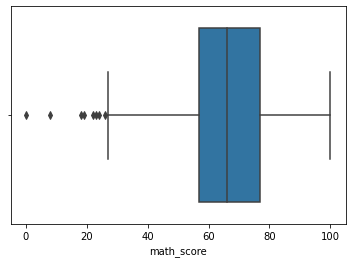

In [5]:
import seaborn as sns 

sns.boxplot(df.math_score)

We can see from the boxplot that the highest score was 100 and the lowest was 30. Most students averaged between 60 and 80.

<AxesSubplot:>

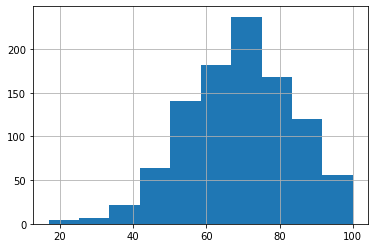

In [7]:
df.reading_score.hist()

<AxesSubplot:>

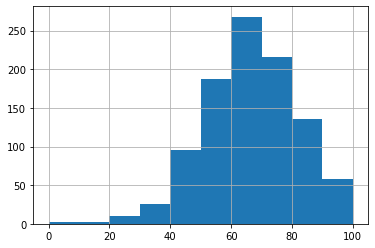

In [8]:
df.math_score.hist()

<AxesSubplot:>

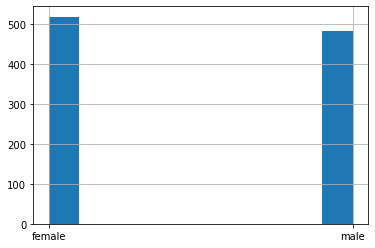

In [9]:
df.gender.hist()

The histogram plot above shows that there are more females than males in the dataset.

In [10]:
df = df[["gender","test_preparation_course","math_score","reading_score","writing_score"]]

In the above code we create a new dataframe with the selected columns

In [11]:
df.isna().sum()

gender                     0
test_preparation_course    0
math_score                 0
reading_score              0
writing_score              0
dtype: int64

In [12]:
df.isnull().sum()

gender                     0
test_preparation_course    0
math_score                 0
reading_score              0
writing_score              0
dtype: int64

There are no missing values in the dataset.

In [18]:
total_score = df["math_score"] + df["reading_score"] + df["writing_score"]
df["total_score"] = total_score
df = df[["gender","test_preparation_course","math_score","reading_score","writing_score","total_score"]]
df.head()

,gender,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,none,72,72,74,218
1,female,completed,69,90,88,247
2,female,none,90,95,93,278
3,male,none,47,57,44,148
4,male,none,76,78,75,229


We calculate the total score of the student by adding the **math_score**, **reading_score** and **writing_score** columns and save these new values to a new column **total_score**

In [19]:
average_score = df["total_score"] / 3
df["average_score"] = average_score
df

,gender,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,none,72,72,74,218,72.666667
1,female,completed,69,90,88,247,82.333333
2,female,none,90,95,93,278,92.666667
3,male,none,47,57,44,148,49.333333
4,male,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...
995,female,completed,88,99,95,282,94.000000
996,male,none,62,55,55,172,57.333333
997,female,completed,59,71,65,195,65.000000
998,female,completed,68,78,77,223,74.333333


We calculate the average score of a student by dividing the column **total_score** by 3 and then save those values to a column named **average_score**.

Text(0, 0.5, 'Average Score')

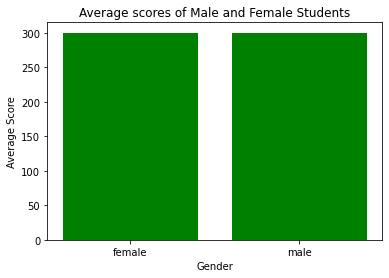

In [25]:
import matplotlib.pyplot as plt
plt.bar(df["gender"],df["total_score"],  color='g')
plt.title("Average scores of Male and Female Students")
plt.xlabel("Gender")
plt.ylabel('Average Score')

plt.show()

In [36]:
df1= pd.DataFrame(df)

Saving the updated dataframe **df** to the variable **df1**

In [38]:
df1.to_csv('students2.csv')


Now we can save the dataframe **df1** to a new csv file called **students2.csv** with the function **df1.to_csv()**